<a href="https://colab.research.google.com/github/jmelsbach/ai-im/blob/main/notebooks/Lecture/AIIM%20L02%20-%20Introduction%20to%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/johannesmelsbach/ai-im/blob/main/notebooks/Lecture/02%20-%20Introduction%20to%20Neural%20Networks.ipynb)

# Lecture 02 Notebook - Introduction to Neural Networks

The notebook is accomponying Lecture 02 - Introduction to Neural Networks.

This and the following notebooks accompany the lecture to show you how to implement neural networks and the like using PyTorch & Co with relatively little effort. You will see that most of the concepts, techniques and functions are already available and it is often very easy to make use of them. All notebooks will be connected to [Colab](https://colab.research.google.com/notebooks/intro.ipynb) such that you can directly execute the code and play with it by yourself. We encourage you to not just execute the code but to also think about it in detail. 

Further, we implemented the code such that each subchapter is executable without the need of executing previous subchapter. Imports and helper functions might appear to be redundant.

This notebook should give you a first impression of how to implement very basic Neural Networks. We'll implement/use some of the terminologies and techniques used in the lecture such as a fordward pass with and without activation functions. 

Have fun & keep coding!

Authors: Johannes Melsbach & Jannik Rößler

## 1. Forward Pass without Activation Function

Let's get started with building a simple Neural Network with one hidden layer. We will use the example and the weights from the lecture to illustrate how a forward pass is working (without activation function)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 1.1 Create a Neural Network

Define a custom Module using PyTorchs' Module subclass

While we define input, hidden and output layers as well as other components of the Network in the *init* function, we implement the forward loop inside the *forward* function. Note that we use a fully connected layer (a fully connected layer is a layer where each neuron is connected to each neuron of the previous layer) as hidden layer.

Components:

* [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): Creates a Fully-Connected Layer

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Create Hidden Layer
        self.hidden_layer = nn.Linear(in_features=3, out_features=3, bias=False)  # For demonstration purposes we will ignore the bias
        # Create Output Layer
        self.output_layer = nn.Linear(in_features=3, out_features=1, bias=False)  # For demonstration purposes we will ignore the bias

    def forward(self, X):
        z1 = self.hidden_layer(X)
        z2 = self.output_layer(z1)
        return z2
    
net = NeuralNetwork()

### 1.2 Define Custom Weights

We can have a look at the weights of the neural network:

In [7]:
net.hidden_layer.weight, net.output_layer.weight

(Parameter containing:
 tensor([[-0.5521,  0.2822, -0.2671],
         [ 0.3106,  0.2559,  0.4874],
         [ 0.1301,  0.0834, -0.1987]], requires_grad=True),
 Parameter containing:
 tensor([[-0.4699, -0.1539,  0.0005]], requires_grad=True))

The weights are initialized randomly. We will replace the weights of the network to match the example in the lecture. Of course this wouldn't be done in practice and is just for demonstration purposes.

In [8]:
hidden_weights = nn.Parameter(torch.tensor([[0.5, 1.0, -0.5],[0.75, -1.0, 0.5],[0.25, -0.5, 0.5]]))
output_weights = nn.Parameter(torch.tensor([[0.25, 0.84, 0.5]]))

net.hidden_layer.weight = hidden_weights
net.output_layer.weight = output_weights

Let's see if it worked

In [9]:
net.hidden_layer.weight, net.output_layer.weight

(Parameter containing:
 tensor([[ 0.5000,  1.0000, -0.5000],
         [ 0.7500, -1.0000,  0.5000],
         [ 0.2500, -0.5000,  0.5000]], requires_grad=True),
 Parameter containing:
 tensor([[0.2500, 0.8400, 0.5000]], requires_grad=True))

Now we define our Training example:

### 1.3 Forward Pass

In [10]:
# Create training example
training_example = torch.tensor([1., 0.5, 1.5])

We can feed the `training_example` example into the neural network by using the network like a function.

In [48]:
net(training_example)

tensor([0.7492], grad_fn=<SigmoidBackward0>)

## 2. Activation Functions

### 2.1 Sigmoid Function

In [12]:
import torch
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def draw_function(func):
    x = torch.tensor(np.linspace(-8.,8., 100))
    y = torch.tensor([func(value) for value in x])
    plt.plot(x,y)
    plt.show()

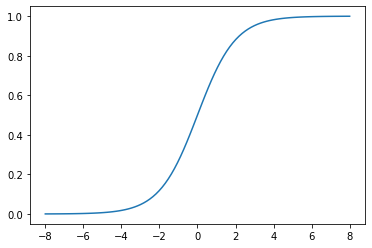

In [14]:
draw_function(sigmoid)

In [15]:
a = torch.tensor(-4.)
b = torch.tensor(3.)
c = torch.tensor(8.)

In [16]:
print(sigmoid(a))
print(sigmoid(b))
print(sigmoid(c))

tensor(0.0180)
tensor(0.9526)
tensor(0.9997)


### 2.2 ReLU

In [17]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import relu

In [18]:
def draw_function(func):
    x = torch.tensor(np.linspace(-8.,8., 100))
    y = torch.tensor([func(value) for value in x])
    plt.plot(x,y)
    plt.show()

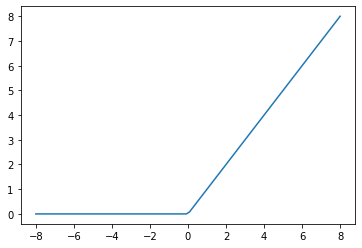

In [19]:
draw_function(relu)

In [20]:
a = torch.tensor(-4.)
b = torch.tensor(3.)
c = torch.tensor(8.)

In [21]:
print(relu(a))
print(relu(b))
print(relu(c))

tensor(0.)
tensor(3.)
tensor(8.)


### 2.3 tanh

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import tanh

In [23]:
def draw_function(func):
    x = torch.tensor(np.linspace(-8.,8., 100))
    y = torch.tensor([func(value) for value in x])
    plt.plot(x,y)
    plt.show()

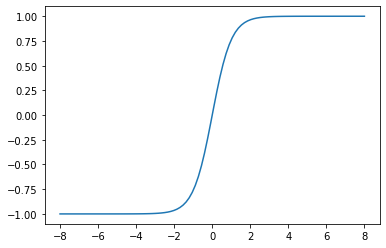

In [24]:
draw_function(tanh)

In [25]:
a = torch.tensor(-4.)
b = torch.tensor(3.)
c = torch.tensor(8.)

In [26]:
print(tanh(a))
print(tanh(b))
print(tanh(c))

tensor(-0.9993)
tensor(0.9951)
tensor(1.0000)


### 2.4 Softmax

In [27]:
from torch import softmax

In [28]:
o = torch.tensor([0.25, 3.55, 0.85, 0.12])

We need to provide the tensor as well as the dimension which should be transformed. Here, we are using a tensor with only one dimension, and thus, we want to apply the Softmax on dimension 0.

In [29]:
softmax(o, dim=0)

tensor([0.0325, 0.8799, 0.0591, 0.0285])

### 2.5 Linear Functions

In [30]:
def draw_function(func):
    x = torch.tensor(np.linspace(-8.,8., 100))
    y = torch.tensor([func(value) for value in x])
    plt.plot(x,y)
    plt.show()

In [31]:
def f1(x):
    return 2 * x + 3

In [32]:
def f2(x):
    return 3 * x + 4

In [33]:
def f1_f2(x):
    return f2(f1(x))

In [34]:
def f3(x):
    return 6 * x + 13

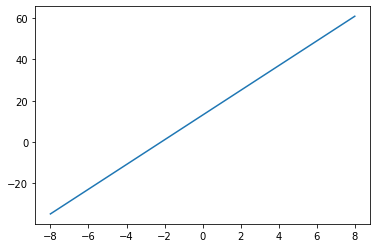

In [35]:
draw_function(f1_f2)

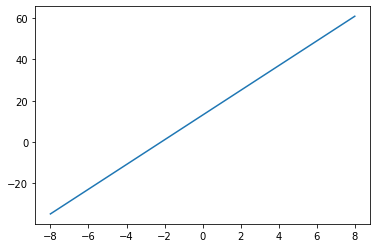

In [36]:
draw_function(f3)

## 3. Forward Pass with Activation Function

As we said in the lecture, we need to introduce non-linearity to tacke non-linear problems. Thus, let's integrate an activation function (here: Sigmoid.

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 3.1 Create a Neural Network

The Neural Network architecture is very similar to the one above, except that we now use a Sigmoid activation function in our forward loop to transform the input.

Components:

* [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): Creates a Fully-Connected Layer
* [torch.sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html#torch.sigmoid): Sigmoid activation function

In [40]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Create Hidden Layer
        self.hidden_layer = nn.Linear(in_features=3, out_features=3, bias=False)  # For demonstration purposes we will ignore the bias
        # Create Output Layer
        self.output_layer = nn.Linear(in_features=3, out_features=1, bias=False)  # For demonstration purposes we will ignore the bias

    def forward(self, X):
        z1 = self.hidden_layer(X)
        a1 = torch.sigmoid(z1)
        z2 = self.output_layer(a1)
        a2 = torch.sigmoid(z2)
        
        return a2
    
net = NeuralNetwork()

### 3.2 Add Custom Weights

In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor. See [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html#what-is-a-state-dict) for more information.

In [41]:
net.state_dict()

OrderedDict([('hidden_layer.weight', tensor([[-0.1215,  0.5227,  0.1450],
                      [-0.2687,  0.5245, -0.1748],
                      [-0.0895,  0.0290, -0.2110]])),
             ('output_layer.weight', tensor([[ 0.2070, -0.5287, -0.4963]]))])

Change weights again

In [42]:
hidden_weights = nn.Parameter(torch.tensor([[0.5, 1.0, -0.5],[0.75, -1.0, 0.5],[0.25, -0.5, 0.5]]))
output_weights = nn.Parameter(torch.tensor([[0.25, 0.84, 0.5]]))

net.hidden_layer.weight = hidden_weights
net.output_layer.weight = output_weights

### 3.3 Forward Pass

In [43]:
training_example = torch.tensor([1., 0.5, 1.5])

In [44]:
net(training_example)

tensor([0.7492], grad_fn=<SigmoidBackward0>)

## 4. Training Loop

So far, we learned that training a neural network consists of 4 steps:

1. Forward Pass
2. Calculate Loss
3. Calculate Gradients
4. Optimize the Weights

Training a neural networks usually requires that we go over and over these steps until the network converges. In the following we will give you a very simple example of how to implement such a training loop, using all the concept we have learned in the lecture. Note that this is not a best practice example, rather it is a very first start to understand what a training loop in PyTorch looks like.

### 4.1 The Data set

First, we will create a data set which contains information about the students who took the AIIM course last year (of course we made these numbers up!). You can think of the target variable (y) as the percentage for correct tasks in the exam , while the features x1 and x2 can be seen as how many hours the students worked on the lectures and excersice notebooks, respectively. 

In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)

# Features: Generate random numbers for x1 and x2 (between 0 and 100)
x = np.random.rand(100, 2) * 100

# Target
y = 0.01 * np.random.randn(100) + np.log(x[:,0]) + np.log(x[:,1])
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()

### 4.2 Create Training, Validation and Test Split

We will create a training, validation and test set with the following ratio: 60:20:20. The training set will be used for updating the neural networks parameters. The validation set will be used to prevent overfitting while our final evaulation will be on the test set.

In [ ]:
# First, create Training (60%) and Validatation/Test Split (40%)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.40, random_state=seed)

# Second, create Validation (50%) and Test Split (50%)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.50, random_state=seed)

In [ ]:
# Create Tensor

# Training
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)

# Validation
x_valid = torch.from_numpy(x_valid).type(torch.FloatTensor)
y_valid = torch.from_numpy(y_valid).type(torch.FloatTensor)

# Test
x_test = torch.from_numpy(x_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.FloatTensor)

#### TensorDataset

PyTorch’s TensorDataset is a Dataset wrapping tensors. By defining a length and way of indexing, this also gives us a way to iterate, index, and slice along the first dimension of a tensor. This will make it easier to **access both the independent and dependent variables** in the same line as we train.

In [ ]:
from torch.utils.data import TensorDataset 

train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
test_ds = TensorDataset(x_test, y_test)

#### DataLoader

Pytorch’s DataLoader is responsible for managing batches. You can create a DataLoader from any Dataset. DataLoader makes it easier to iterate over batches.

In [ ]:
from torch.utils.data import DataLoader

# Create training DataLoader
BATCH_SIZE = 2
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE*2, shuffle=True)  # We can increase the batch size of validation because of less computational complexity
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, shuffle=True)  # We can increase the batch size of test because of less computational complexity

### 4.3 Create Neural Network

Before you look at the code, think about what the network should look like? How many input neurons do you have? How many output neurons do you have? What is the activation function in your output layer?

In [ ]:
import torch.nn as nn

Components:

* [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear): Creates a Fully-Connected Layer
* [torch.sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html#torch.sigmoid): Sigmoid activation function
* [torch.flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html): Flatten function

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(in_features=2, out_features=5)
        self.output_layer = nn.Linear(in_features=5, out_features=1)

    def forward(self, X):
        z1 = self.hidden_layer(X)
        a1 = torch.relu(z1)
        z2 = self.output_layer(a1)
        a2 = torch.sigmoid(z2)
        
        # TODO: Check the shape of the tensor yourself using a2.shape before and after calling the flatten method. What changes?
        y_hat = torch.flatten(a2)  # Flatten a tensor such that it has a single dimension
        return y_hat
    
net = NeuralNetwork()

### 4.4 Training Loop

In [ ]:
# Define the number of epochs (the number of training iterations over the entire data set)
n_epochs = 10
# Define the optimizer. Here we will use Stochastic Gradient Descent
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
# We will use MSE as our loss function
loss_func = nn.MSELoss()
# Flag for printing
VERBOSE = True

In [ ]:
# Store the losses of each epoch for plotting purposes
loss_train_list = []
loss_valid_list = []

# Iterate over the dataset n_epochs times
for epoch in range(n_epochs):
    net.train()  # net.eval() will notify all your layers that you are in training mode
    # Sum of all losses (of all batches in one epoch)
    batches_train_loss = 0
    # For each batch, pass the training examples, calculate loss and gradients and optimize the parameters
    for xb, yb in train_dl:
        # TODO: Check yourself what xb and yb actually look like. What shapes are you expecting?
        optimizer.zero_grad()  # zero_grad clears old gradients from the last step
        y_hat = net(xb)  # Forward pass
        loss = loss_func(y_hat, yb)  # Calculate Loss
        loss.backward()  # Calculate the gradients (using backpropagation)
        optimizer.step()  # # Optimize the parameters: opt.step() causes the optimizer to take a step based on the gradients of the parameters.
        batches_train_loss += loss.item()
    
    batches_valid_loss = 0
    net.eval()  # net.eval() will notify all your layers that you are in evaluation mode
    # torch.no_grad() impacts the autograd engine and deactivate it. It will reduce memory usage and speed 
    # up computations but you won’t be able to backprop (which you don’t want in an evaluation script).
    with torch.no_grad():
        # Perform a prediction on the validation set  
        for xb_valid, yb_valid in valid_dl:

            y_hat = net(xb_valid)  # Forward pass
            loss = loss_func(y_hat, yb_valid)  # Calculate Loss
            batches_valid_loss += loss.item()
        
    if VERBOSE:
        print(f"Train Loss (MSE) in epoch {epoch}: {batches_train_loss:.2f}")
        print(f"Validation Loss (MSE) in epoch {epoch}: {batches_valid_loss:.2f}\n")
    loss_train_list.append(batches_train_loss)
    loss_valid_list.append(batches_valid_loss)

### 4.5 Plot Loss

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(loss_train_list, color='red', label='Training Loss')
ax1.plot(loss_valid_list, color='blue', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax1.legend()
fig.tight_layout()

### 4.6 Test Performance

**Important:** Only execute the following steps, if you are satisfied with your model (performance on training and validation set is well and no sign of overfitting or underfitting)

In [ ]:
batches_test_loss = 0
with torch.no_grad():
    # Perform a prediction on the test set  
    for xb_test, yb_test in test_dl:

        y_hat = net(xb_test)  # Forward pass
        loss = loss_func(y_hat, yb_test)  # Calculate Loss
        batches_test_loss += loss.item()

print(f"Test MSE is: {batches_test_loss:.2f}")

That's it! Although the example above is only a mini working example, it should give you a first impression of how to write a training loop in PyTorch. We will learn to improve the code in the next lectures. To start with, ask yourself: How can you improve the MSE Loss? What are possible opportunities (adjusting screws) to increase performance?

## 5. Questions

1. Why do we need activation functions?
2. What activation function should be used in the output layer?
3. What does nn.Linear do in PyTorch? What parameters is the function expecting?
4. Which activation function should be used in multi-label classification
5. Why is the Sigmoid activation function depreciated in feed-forward neural networks?